In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplot
import geopandas as geopd

In [2]:
# Import wards geodata
mw_geodf = geopd.read_file('data/Melton_Wards.geojson')
mw_geodf.head(5)

,objectid,wd18cd,wd18nm,wd18nmw,bng_e,bng_n,long,lat,st_areashape,st_lengthshape,geometry
0,3143,E05005495,Asfordby,,471291,319906,-0.94471,52.772072,1.057578e+07,18199.830525,POLYGON ((-0.9106282891714588 52.7870079082269...
1,3144,E05005496,Bottesford,,480832,339389,-0.79849,52.945831,2.699590e+07,27410.461175,POLYGON ((-0.778278647253454 52.97692337951001...
2,3145,E05005497,Croxton Kerrial,,481553,328878,-0.79040,52.851250,7.588944e+07,52719.483214,POLYGON ((-0.7745428354597341 52.9073426700268...
3,3146,E05005498,Frisby-on-the-Wreake,,469099,321325,-0.97689,52.785099,4.914039e+07,41800.627180,POLYGON ((-0.9466806303245768 52.7863759141929...
4,3147,E05005499,Gaddesby,,475671,314321,-0.88108,52.721272,4.511536e+07,43949.763652,POLYGON ((-0.8294453447389358 52.7292348451995...


In [295]:
# Create separate DF with only the Melton Mowbray wards
#mo_geodf = mw_geodf[mw_geodf['wd18nm'].str.contains('Melton', case=False)]
#mo_geodf

,objectid,wd18cd,wd18nm,wd18nmw,bng_e,bng_n,long,lat,st_areashape,st_lengthshape,geometry
6,3149,E05005501,Melton Craven,,476646,318253,-0.86573,52.756481,3.246314e+06,8717.694455,POLYGON ((-0.8484652309189349 52.7658661166475...
7,3150,E05005502,Melton Dorian,,473968,317568,-0.90556,52.750690,4.989479e+06,11953.495487,POLYGON ((-0.8897129842614639 52.7644028822994...
8,3151,E05005503,Melton Egerton,,473900,319358,-0.90616,52.766788,3.561920e+06,9609.503308,POLYGON ((-0.8874280733559646 52.7720014566612...
9,3152,E05005504,Melton Newport,,476404,320712,-0.86875,52.778610,4.960028e+06,14122.390754,POLYGON ((-0.8479707680386437 52.7694915256634...
10,3153,E05005505,Melton Sysonby,,474464,321176,-0.89739,52.783051,3.691605e+06,9322.896723,POLYGON ((-0.8902822743521907 52.7934135054011...
11,3154,E05005506,Melton Warwick,,475757,317338,-0.87911,52.748379,2.611056e+06,8490.606964,POLYGON ((-0.8663759580571425 52.7462650423512...


In [3]:
# Import candidate data
cand_df = pd.read_csv('data/candidates.csv')
cand_df.head(5)

,Name,Ward,Party,Sex
0,Steven Carter,Asfordby,IND,M
1,Ronnie de Burle,Asfordby,CON,M
2,Mal Sheldon,Asfordby,CON,M
3,Pru Chandler,Bottesford,CON,F
4,Donald Pritchett,Bottesford,IND,M


In [4]:
cands_per_ward = cand_df.groupby(['Ward'])[['Name']].size().reset_index(name='Cand_Count')
cands_per_ward

,Ward,Cand_Count
0,Asfordby,3
1,Bottesford,2
2,Croxton Kerrial,2
3,Frisby-on-the-Wreake,1
4,Gaddesby,1
5,Long Clawson and Stathern,3
6,Melton Craven,6
7,Melton Dorian,4
8,Melton Egerton,6
9,Melton Newport,5


In [5]:
# Import seat data
seat_df = pd.read_csv('data/seats.csv')
seat_df = pd.merge(seat_df, cands_per_ward, on='Ward')
seat_df["Contested"] = np.where(seat_df['Cand_Count'] > seat_df['Seats'], True, False)
seat_df

mw_geodf = pd.merge(mw_geodf, seat_df.set_index('Ward'), left_on='wd18nm', right_index=True)

mw_geodf

,objectid,wd18cd,wd18nm,wd18nmw,bng_e,bng_n,long,lat,st_areashape,st_lengthshape,geometry,Seats,Cand_Count,Contested
0,3143,E05005495,Asfordby,,471291,319906,-0.94471,52.772072,1.057578e+07,18199.830525,POLYGON ((-0.9106282891714588 52.7870079082269...,2,3,True
1,3144,E05005496,Bottesford,,480832,339389,-0.79849,52.945831,2.699590e+07,27410.461175,POLYGON ((-0.778278647253454 52.97692337951001...,2,2,False
2,3145,E05005497,Croxton Kerrial,,481553,328878,-0.79040,52.851250,7.588944e+07,52719.483214,POLYGON ((-0.7745428354597341 52.9073426700268...,1,2,True
3,3146,E05005498,Frisby-on-the-Wreake,,469099,321325,-0.97689,52.785099,4.914039e+07,41800.627180,POLYGON ((-0.9466806303245768 52.7863759141929...,1,1,False
4,3147,E05005499,Gaddesby,,475671,314321,-0.88108,52.721272,4.511536e+07,43949.763652,POLYGON ((-0.8294453447389358 52.7292348451995...,1,1,False
5,3148,E05005500,Long Clawson and Stathern,,475620,330505,-0.87810,52.866741,6.027276e+07,43506.092006,POLYGON ((-0.7944330332004073 52.9030852777065...,2,3,True
6,3149,E05005501,Melton Craven,,476646,318253,-0.86573,52.756481,3.246314e+06,8717.694455,POLYGON ((-0.8484652309189349 52.7658661166475...,2,6,True
7,3150,E05005502,Melton Dorian,,473968,317568,-0.90556,52.750690,4.989479e+06,11953.495487,POLYGON ((-0.8897129842614639 52.7644028822994...,3,4,True
8,3151,E05005503,Melton Egerton,,473900,319358,-0.90616,52.766788,3.561920e+06,9609.503308,POLYGON ((-0.8874280733559646 52.7720014566612...,2,6,True
9,3152,E05005504,Melton Newport,,476404,320712,-0.86875,52.778610,4.960028e+06,14122.390754,POLYGON ((-0.8479707680386437 52.7694915256634...,3,5,True


In [6]:
# Create separate DF with only the contested wards
co_geodf = mw_geodf[mw_geodf['Contested'] == True]
co_geodf

,objectid,wd18cd,wd18nm,wd18nmw,bng_e,bng_n,long,lat,st_areashape,st_lengthshape,geometry,Seats,Cand_Count,Contested
0,3143,E05005495,Asfordby,,471291,319906,-0.94471,52.772072,1.057578e+07,18199.830525,POLYGON ((-0.9106282891714588 52.7870079082269...,2,3,True
2,3145,E05005497,Croxton Kerrial,,481553,328878,-0.79040,52.851250,7.588944e+07,52719.483214,POLYGON ((-0.7745428354597341 52.9073426700268...,1,2,True
5,3148,E05005500,Long Clawson and Stathern,,475620,330505,-0.87810,52.866741,6.027276e+07,43506.092006,POLYGON ((-0.7944330332004073 52.9030852777065...,2,3,True
6,3149,E05005501,Melton Craven,,476646,318253,-0.86573,52.756481,3.246314e+06,8717.694455,POLYGON ((-0.8484652309189349 52.7658661166475...,2,6,True
7,3150,E05005502,Melton Dorian,,473968,317568,-0.90556,52.750690,4.989479e+06,11953.495487,POLYGON ((-0.8897129842614639 52.7644028822994...,3,4,True
8,3151,E05005503,Melton Egerton,,473900,319358,-0.90616,52.766788,3.561920e+06,9609.503308,POLYGON ((-0.8874280733559646 52.7720014566612...,2,6,True
9,3152,E05005504,Melton Newport,,476404,320712,-0.86875,52.778610,4.960028e+06,14122.390754,POLYGON ((-0.8479707680386437 52.7694915256634...,3,5,True
10,3153,E05005505,Melton Sysonby,,474464,321176,-0.89739,52.783051,3.691605e+06,9322.896723,POLYGON ((-0.8902822743521907 52.7934135054011...,3,5,True
11,3154,E05005506,Melton Warwick,,475757,317338,-0.87911,52.748379,2.611056e+06,8490.606964,POLYGON ((-0.8663759580571425 52.7462650423512...,2,4,True
12,3155,E05005507,Old Dalby,,469769,324395,-0.96631,52.812611,3.466571e+07,38051.743219,POLYGON ((-0.9608517010854984 52.8433566644294...,1,2,True


In [7]:
# Dict of party colours
party_col_dict = dict([
    ("LAB", "red"), 
    ("CON", "mediumblue"), 
    ("LD", "gold"), 
    ("GRN", "green"), 
    ("UKIP", "purple"), 
    ("IND", "gray"), 
    ("-", "gray")])
party_col_dict

{'LAB': 'red',
 'CON': 'mediumblue',
 'LD': 'gold',
 'GRN': 'green',
 'UKIP': 'purple',
 'IND': 'gray',
 '-': 'gray'}

In [8]:
# Use the lbl columns to adjust the display and position of the name labels 
# (some are fine with just the centroids from the original data)

mw_geodf["lbl_long"] = mw_geodf["long"]
mw_geodf["lbl_lat"] = mw_geodf["lat"]
mw_geodf["lbl_name"] = mw_geodf["wd18nm"]

# at uses [{index}{col}]

mw_geodf.at[5, 'lbl_name'] = 'Long Clawson\nand Stathern'
mw_geodf.at[5, 'lbl_long'] = mw_geodf.at[5, 'long'] - 0.02

mw_geodf.at[6, 'lbl_name'] = 'Melton\nCraven'
mw_geodf.at[6, 'lbl_long'] = mw_geodf.at[6, 'long'] - 0.005
mw_geodf.at[6, 'lbl_lat'] = mw_geodf.at[6, 'lat'] - 0.0025

mw_geodf.at[7, 'lbl_name'] = 'Melton\nDorian'
mw_geodf.at[7, 'lbl_long'] = mw_geodf.at[7, 'long'] - 0.0075
mw_geodf.at[7, 'lbl_lat'] = mw_geodf.at[7, 'lat'] - 0.005

mw_geodf.at[8, 'lbl_name'] = 'Melton\nEgerton'
mw_geodf.at[8, 'lbl_long'] = mw_geodf.at[8, 'long'] - 0.015
mw_geodf.at[8, 'lbl_lat'] = mw_geodf.at[8, 'lat'] - 0.002

mw_geodf.at[9, 'lbl_name'] = 'Melton\nNewport'
mw_geodf.at[9, 'lbl_long'] = mw_geodf.at[9, 'long'] - 0.01
mw_geodf.at[9, 'lbl_lat'] = mw_geodf.at[9, 'lat'] - 0.001

mw_geodf.at[10, 'lbl_name'] = 'Melton\nSysonby'
mw_geodf.at[10, 'lbl_long'] = mw_geodf.at[10, 'long'] - 0.012
mw_geodf.at[10, 'lbl_lat'] = mw_geodf.at[10, 'lat'] - 0.005

mw_geodf.at[11, 'lbl_name'] = 'Melton\nWarwick'
mw_geodf.at[11, 'lbl_long'] = mw_geodf.at[11, 'long'] - 0.01
mw_geodf.at[11, 'lbl_lat'] = mw_geodf.at[11, 'lat'] - 0.005

mw_geodf.at[3, 'lbl_long'] = mw_geodf.at[3, 'long'] - 0.05
mw_geodf.at[3, 'lbl_lat'] = mw_geodf.at[3, 'lat'] - 0.01

mw_geodf.at[14, 'lbl_long'] = mw_geodf.at[14, 'long'] - 0.03

mw_geodf.at[0, 'lbl_long'] = mw_geodf.at[0, 'long'] - 0.01

In [9]:
d = {'group': [0, 1, 2, 3, 4], 'start_long': [-1.035, -0.935, -0.735, -0.635, -0.535], 'start_lat': [52.96, 52.96, 52.96, 52.96, 52.96]}
#d = {'group': [0, 1], 'start_long': [-0.635, -0.535], 'start_lat': [52.96, 52.96]}

group_df = pd.DataFrame(data = d)
group_df

,group,start_long,start_lat
0,0,-1.035,52.96
1,1,-0.935,52.96
2,2,-0.735,52.96
3,3,-0.635,52.96
4,4,-0.535,52.96


In [10]:
mw_geodf['display_group'] = -1

mw_geodf.at[0, 'display_group'] = 0
mw_geodf.at[1, 'display_group'] = 0
mw_geodf.at[2, 'display_group'] = 0
mw_geodf.at[3, 'display_group'] = 1
mw_geodf.at[4, 'display_group'] = 2
mw_geodf.at[5, 'display_group'] = 2
mw_geodf.at[6, 'display_group'] = 3
mw_geodf.at[7, 'display_group'] = 3
mw_geodf.at[8, 'display_group'] = 3
mw_geodf.at[9, 'display_group'] = 3
mw_geodf.at[10, 'display_group'] = 4
mw_geodf.at[11, 'display_group'] = 4
mw_geodf.at[12, 'display_group'] = 4
mw_geodf.at[13, 'display_group'] = 4
mw_geodf.at[14, 'display_group'] = 4
mw_geodf.at[15, 'display_group'] = 4


mw_geodf

,objectid,wd18cd,wd18nm,wd18nmw,bng_e,bng_n,long,lat,st_areashape,st_lengthshape,geometry,Seats,Cand_Count,Contested,lbl_long,lbl_lat,lbl_name,display_group
0,3143,E05005495,Asfordby,,471291,319906,-0.94471,52.772072,1.057578e+07,18199.830525,POLYGON ((-0.9106282891714588 52.7870079082269...,2,3,True,-0.95471,52.772072,Asfordby,0
1,3144,E05005496,Bottesford,,480832,339389,-0.79849,52.945831,2.699590e+07,27410.461175,POLYGON ((-0.778278647253454 52.97692337951001...,2,2,False,-0.79849,52.945831,Bottesford,0
2,3145,E05005497,Croxton Kerrial,,481553,328878,-0.79040,52.851250,7.588944e+07,52719.483214,POLYGON ((-0.7745428354597341 52.9073426700268...,1,2,True,-0.79040,52.851250,Croxton Kerrial,0
3,3146,E05005498,Frisby-on-the-Wreake,,469099,321325,-0.97689,52.785099,4.914039e+07,41800.627180,POLYGON ((-0.9466806303245768 52.7863759141929...,1,1,False,-1.02689,52.775099,Frisby-on-the-Wreake,1
4,3147,E05005499,Gaddesby,,475671,314321,-0.88108,52.721272,4.511536e+07,43949.763652,POLYGON ((-0.8294453447389358 52.7292348451995...,1,1,False,-0.88108,52.721272,Gaddesby,2
5,3148,E05005500,Long Clawson and Stathern,,475620,330505,-0.87810,52.866741,6.027276e+07,43506.092006,POLYGON ((-0.7944330332004073 52.9030852777065...,2,3,True,-0.89810,52.866741,Long Clawson\nand Stathern,2
6,3149,E05005501,Melton Craven,,476646,318253,-0.86573,52.756481,3.246314e+06,8717.694455,POLYGON ((-0.8484652309189349 52.7658661166475...,2,6,True,-0.87073,52.753981,Melton\nCraven,3
7,3150,E05005502,Melton Dorian,,473968,317568,-0.90556,52.750690,4.989479e+06,11953.495487,POLYGON ((-0.8897129842614639 52.7644028822994...,3,4,True,-0.91306,52.745690,Melton\nDorian,3
8,3151,E05005503,Melton Egerton,,473900,319358,-0.90616,52.766788,3.561920e+06,9609.503308,POLYGON ((-0.8874280733559646 52.7720014566612...,2,6,True,-0.92116,52.764788,Melton\nEgerton,3
9,3152,E05005504,Melton Newport,,476404,320712,-0.86875,52.778610,4.960028e+06,14122.390754,POLYGON ((-0.8479707680386437 52.7694915256634...,3,5,True,-0.87875,52.777610,Melton\nNewport,3


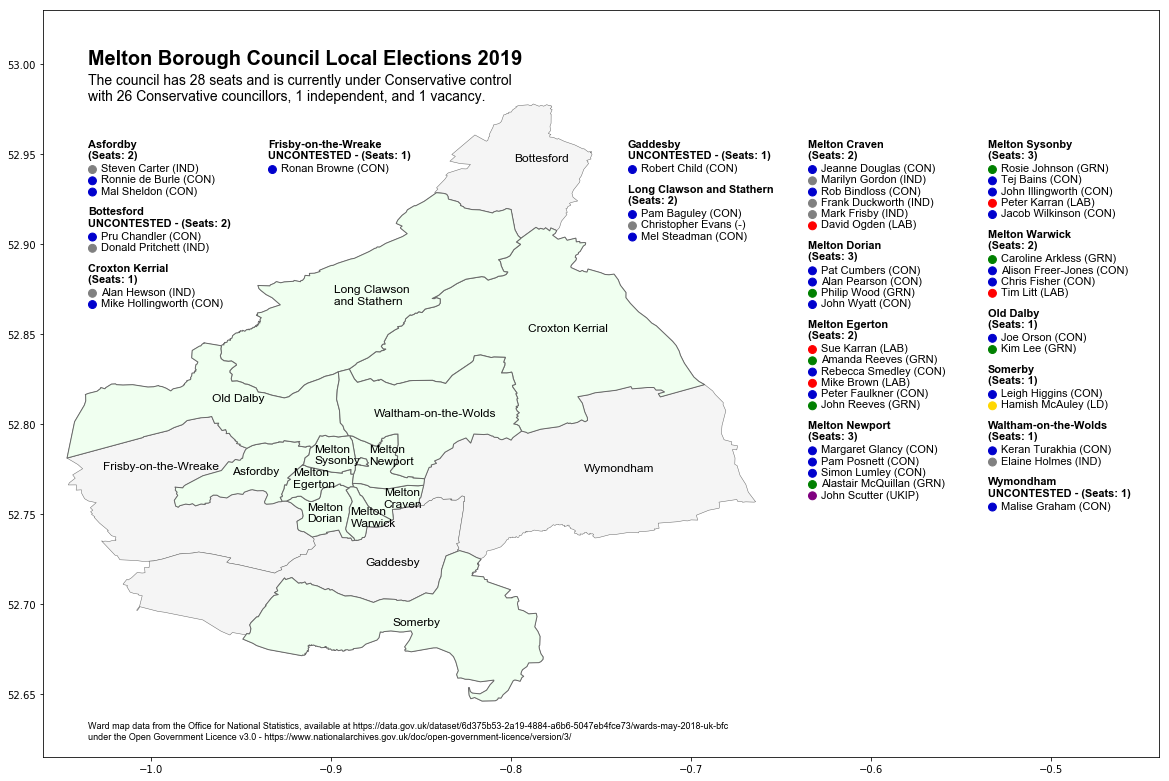

In [11]:
base_plot = mw_geodf.plot(color='whitesmoke', edgecolor='dimgrey',  figsize=(20,15), linewidth = 0.5)
co_geodf.plot(ax=base_plot, color='honeydew', edgecolor='dimgrey', linewidth=1)

for x, y, label in zip(mw_geodf["lbl_long"], mw_geodf["lbl_lat"], mw_geodf["lbl_name"]):
    base_plot.text(x, y, label, fontsize = 12, fontname='Arial')
    
for k in range (len(group_df['group'])):
    group_wards_geodf = pd.DataFrame(mw_geodf[mw_geodf['display_group'] == group_df['group'][k]])
    group_wards_geodf = group_wards_geodf.reset_index()
    
    counter = 1
    for i in range (len(group_wards_geodf['wd18nm'])):
        ward_cands = pd.DataFrame(cand_df[cand_df['Ward'] == group_wards_geodf['wd18nm'][i]])
        ward_cands = ward_cands.reset_index()

        start_long = group_df['start_long'][k]
        start_lat = group_df['start_lat'][k]
        
        text = group_wards_geodf['wd18nm'][i]
        base_plot.text(start_long, start_lat - (counter / 160), text, fontsize = 11, fontweight='bold', fontname='Arial')
        counter += 1
        
        utext = ''
        if (group_wards_geodf['Contested'][i] == False):
            utext += 'UNCONTESTED - '

        utext += '(Seats: ' + str(group_wards_geodf['Seats'][i]) + ')'
        base_plot.text(start_long, start_lat - (counter / 160), utext, fontsize = 11, fontweight='bold', fontname='Arial')
        counter += 1
        
        for j in range (len(ward_cands['Name'])):
            party = ward_cands['Party'][j]
            colour = party_col_dict[ward_cands['Party'][j]]
            text = ward_cands['Name'][j] + ' (' + str(ward_cands['Party'][j]).upper() + ')' 

            circle = mplot.Circle((start_long + 0.0025, start_lat - (counter / 160)), 0.0022, color = colour)            
            base_plot.add_artist(circle)

            base_plot.text(start_long + 0.0075, start_lat - (counter / 160) - 0.001, text, fontsize = 11, fontname='Arial')
            counter += 1
        counter += 1
        
title = 'Melton Borough Council Local Elections 2019'
base_plot.text(-1.035, 53, title, fontsize = 20, fontweight='bold', fontname='Arial')

subtitle = 'The council has 28 seats and is currently under Conservative control\nwith 26 Conservative councillors, 1 independent, and 1 vacancy.'
base_plot.text(-1.035, 52.98, subtitle, fontsize = 14, fontname='Arial')

license = 'Ward map data from the Office for National Statistics, available at https://data.gov.uk/dataset/6d375b53-2a19-4884-a6b6-5047eb4fce73/wards-may-2018-uk-bfc\nunder the Open Government Licence v3.0 - https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/'
base_plot.text(-1.035, 52.625, license, fontsize = 9, fontname='Arial')

base_plot.set_ylim([52.615, 53.03])
base_plot.set_xlim([-1.06, -0.44])

mplot.savefig('output/MBCLocalElections.png')